# Stock price of previous days

In [9]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [10]:
import pandas            as pd
import numpy             as np
import yfinance          as yf
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rc('font', **{'size': 16})


## Example with Apple Inc  
### Click here for Google Finance --> [Apple](https://www.google.com/finance/quote/AAPL:NASDAQ?sa=X&ved=2ahUKEwjH8qGBnar0AhXvSvEDHWO5Di0Q_AUoAXoECAEQAw&window=1M)  

In [6]:
sCompaniesFileName   = 'companies_workbook.csv'
dCompanies           = pd.read_csv(sCompaniesFileName)
dCompanies

,symbol,company_name
0,AAL,american airlines
1,AAPL,apple
2,ABC,abc
3,ABT,abbott
4,ACA,aca
...,...,...
288,XOM,exxon
289,XOM,exxon mobil
290,XRAY,dyson
291,YORW,yorker


In [20]:
dStocks   = pd.DataFrame()
sTickers  = dCompanies['symbol']

for ticker in sTickers:
  oTicker        = yf.Ticker(ticker)
  hist           = oTicker.history(period='50d')
  hist['Symbol'] = ticker
  dStocks        = dStocks.append(hist[['Symbol', 'Close']].rename(columns={'Close': 'Price'}))

- ANDA: No data found, symbol may be delisted
- AOL: None
- BKC: No data found for this date range, symbol may be delisted
- CUB: No data found, symbol may be delisted
- FCAU: No data found, symbol may be delisted
- FCAU: No data found, symbol may be delisted
- FCAU: No data found, symbol may be delisted
- HCAP: No data found, symbol may be delisted
- JSTN: No data found for this date range, symbol may be delisted
- LNKD: None
- NBA: No data found, symbol may be delisted
- PS: No data found, symbol may be delisted
- RCA: None
- SKS: None
- STND: No data found, symbol may be delisted
- TIF: No data found, symbol may be delisted


In [21]:
dStocks

,Symbol,Price
Date,,
2021-09-13,AAL,19.309999
2021-09-14,AAL,19.209999
2021-09-15,AAL,19.379999
2021-09-16,AAL,19.889999
2021-09-17,AAL,19.730000
...,...,...
2021-11-15,ZEN,103.389999
2021-11-16,ZEN,104.129997
2021-11-17,ZEN,103.129997


In [22]:
dStocks.to_csv('stock_price_orig.csv')

In [23]:
dStocks['Prev_01_Day'] = dStocks.groupby(['Symbol'])['Price'].shift(1)
dStocks['Prev_02_Day'] = dStocks.groupby(['Symbol'])['Price'].shift(2)
dStocks['Prev_03_Day'] = dStocks.groupby(['Symbol'])['Price'].shift(3)
dStocks['Prev_04_Day'] = dStocks.groupby(['Symbol'])['Price'].shift(4)
dStocks['Prev_05_Day'] = dStocks.groupby(['Symbol'])['Price'].shift(5)


In [24]:
dStocks

,Symbol,Price,Prev_01_Day,Prev_02_Day,Prev_03_Day,Prev_04_Day,Prev_05_Day
Date,,,,,,,
2021-09-13,AAL,19.309999,NaN,NaN,NaN,NaN,NaN
2021-09-14,AAL,19.209999,19.309999,NaN,NaN,NaN,NaN
2021-09-15,AAL,19.379999,19.209999,19.309999,NaN,NaN,NaN
2021-09-16,AAL,19.889999,19.379999,19.209999,19.309999,NaN,NaN
2021-09-17,AAL,19.730000,19.889999,19.379999,19.209999,19.309999,NaN
...,...,...,...,...,...,...,...
2021-11-15,ZEN,103.389999,103.830002,100.129997,100.639999,100.349998,101.000000
2021-11-16,ZEN,104.129997,103.389999,103.830002,100.129997,100.639999,100.349998
2021-11-17,ZEN,103.129997,104.129997,103.389999,103.830002,100.129997,100.639999


In [25]:
dStocks.to_csv('stock_price_5days.csv')


In [30]:
dApple = dStocks[dStocks['Symbol']=='AAPL']
dApple

,Symbol,Price,Prev_01_Day,Prev_02_Day,Prev_03_Day,Prev_04_Day,Prev_05_Day
Date,,,,,,,
2021-09-13,AAPL,149.332062,NaN,NaN,NaN,NaN,NaN
2021-09-14,AAPL,147.904129,149.332062,NaN,NaN,NaN,NaN
2021-09-15,AAPL,148.812805,147.904129,149.332062,NaN,NaN,NaN
2021-09-16,AAPL,148.573151,148.812805,147.904129,149.332062,NaN,NaN
2021-09-17,AAPL,145.847137,148.573151,148.812805,147.904129,149.332062,NaN
2021-09-20,AAPL,142.731689,145.847137,148.573151,148.812805,147.904129,149.332062
2021-09-21,AAPL,143.220963,142.731689,145.847137,148.573151,148.812805,147.904129
2021-09-22,AAPL,145.637451,143.220963,142.731689,145.847137,148.573151,148.812805
2021-09-23,AAPL,146.616028,145.637451,143.220963,142.731689,145.847137,148.573151


### The lines are not identical 100% because of the weekend time

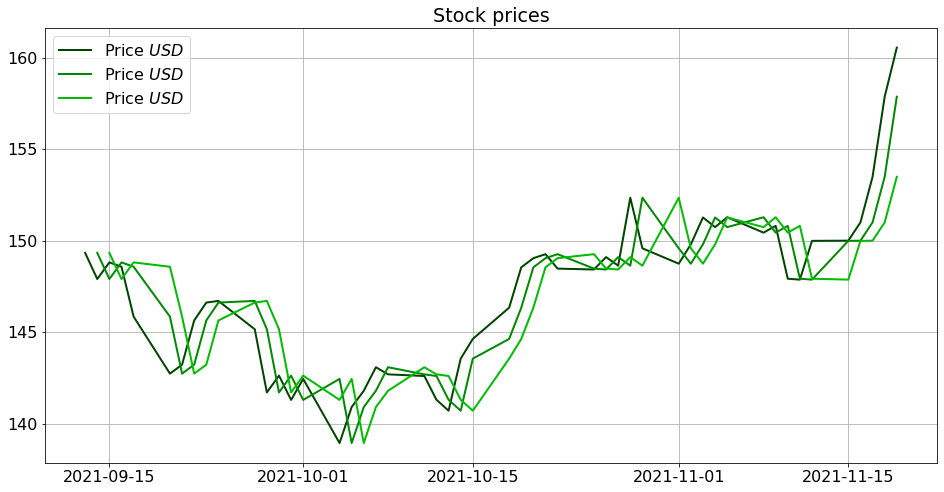

In [36]:
plt.figure(figsize=(16,8))
plt.plot  (dApple['Price']      , c="#004400", lw=2, label="Price $USD$")
plt.plot  (dApple['Prev_01_Day'], c="#008800", lw=2, label="Price $USD$")
plt.plot  (dApple['Prev_02_Day'], c="#00bb00", lw=2, label="Price $USD$")
plt.title ("Apple Stock prices")
plt.grid  ()
plt.legend()
plt.show  ()

In [28]:
dStocks['Price']

Date
2021-09-13     19.309999
2021-09-14     19.209999
2021-09-15     19.379999
2021-09-16     19.889999
2021-09-17     19.730000
                 ...    
2021-11-15    103.389999
2021-11-16    104.129997
2021-11-17    103.129997
2021-11-18     97.760002
2021-11-19     97.209999
Name: Price, Length: 13805, dtype: float64